# 1. Полносвязные сети (многослойный персептрон)
### Решите задачу классификации на данных, с которыми вы работали в лабораторной No 2, результат сравните с полученными ранее

In [6]:
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
df = pd.read_csv("pulsar_stars.csv")

In [8]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,Type
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [9]:
inputs = df.drop("Type", axis=1)
labels = df['Type']

<AxesSubplot:>

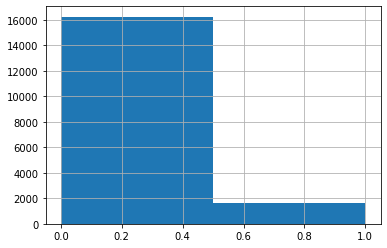

In [10]:
labels.hist(bins=2)  

In [11]:
inputs.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306


## Building the Network

We use 3 fully connected layers. The first layer has an input shape of 8 because there are 8 fields

In [12]:
class PulsarStarNN(nn.Module):
    def __init__(self):
        super(PulsarStarNN, self).__init__()
        self.fc1 = nn.Linear(8, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 2)
        self.softmax = nn.Softmax(dim=1)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.softmax(self.fc3(x))

In [13]:
train_X, test_X, train_y, test_y = train_test_split(inputs, labels, test_size=0.25)
train_X = torch.tensor(train_X.values).float()
train_X

tensor([[ 1.3688e+02,  5.0343e+01,  4.9895e-02,  ...,  2.7450e+01,
          6.2563e+00,  4.0046e+01],
        [ 1.2861e+02,  5.7560e+01, -2.3658e-01,  ...,  9.4742e+00,
          1.9996e+01,  4.7134e+02],
        [ 1.2823e+02,  5.1861e+01,  1.2516e-01,  ...,  1.3047e+01,
          1.1284e+01,  1.6208e+02],
        ...,
        [ 1.3009e+02,  5.3819e+01,  1.2580e-02,  ...,  1.8976e+01,
          8.1628e+00,  7.7611e+01],
        [ 1.1047e+02,  4.1400e+01,  2.6901e-01,  ...,  2.9450e+01,
          5.1517e+00,  2.7192e+01],
        [ 1.2469e+02,  5.5435e+01,  1.3789e-02,  ...,  1.3998e+01,
          9.3828e+00,  1.1886e+02]])

In [14]:
test_X = torch.tensor(test_X.values).float()
train_y = torch.tensor(train_y.values).long()
test_y = torch.tensor(test_y.values).long()
train_y

tensor([0, 0, 0,  ..., 0, 0, 0])

## Training the Network

We will train the neural network for 200 epochs

In [15]:
net = PulsarStarNN()

In [16]:
net

PulsarStarNN(
  (fc1): Linear(in_features=8, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=2, bias=True)
  (softmax): Softmax(dim=1)
)

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)
losses = []
for epoch in range(1, 201):
    optimizer.zero_grad()
    outputs = net(train_X)
    loss = criterion(outputs, train_y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    print("Epoch {}, Loss: {}".format(epoch, loss.item()))

/usr/local/lib/python3.8/dist-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


Epoch 1, Loss: 0.4119891822338104
Epoch 2, Loss: 0.40242329239845276
Epoch 3, Loss: 0.39886000752449036
Epoch 4, Loss: 0.3950626850128174
Epoch 5, Loss: 0.391140341758728
Epoch 6, Loss: 0.38749274611473083
Epoch 7, Loss: 0.38420283794403076
Epoch 8, Loss: 0.3811623454093933
Epoch 9, Loss: 0.3782862722873688
Epoch 10, Loss: 0.37554553151130676
Epoch 11, Loss: 0.3729666769504547
Epoch 12, Loss: 0.3705929219722748
Epoch 13, Loss: 0.3684258759021759
Epoch 14, Loss: 0.36648252606391907
Epoch 15, Loss: 0.3647569417953491
Epoch 16, Loss: 0.36324217915534973
Epoch 17, Loss: 0.3619237542152405
Epoch 18, Loss: 0.3607816994190216
Epoch 19, Loss: 0.3597841262817383
Epoch 20, Loss: 0.3589088022708893
Epoch 21, Loss: 0.3581377863883972
Epoch 22, Loss: 0.3574499189853668
Epoch 23, Loss: 0.35683387517929077
Epoch 24, Loss: 0.35627877712249756
Epoch 25, Loss: 0.3557748794555664
Epoch 26, Loss: 0.355312317609787
Epoch 27, Loss: 0.354888916015625
Epoch 28, Loss: 0.35449641942977905
Epoch 29, Loss: 0.3541

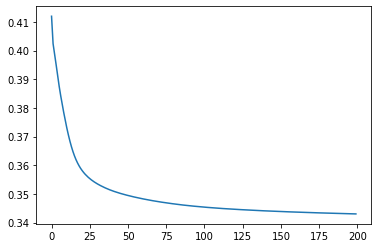

In [18]:
plt.plot(losses)

In [19]:
pred_test = net(test_X)
_, preds_y = torch.max(pred_test, 1)
accuracy_score(test_y, preds_y)

0.9736312849162011

In [20]:
print(classification_report(test_y, preds_y))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4059
           1       0.94      0.76      0.84       416

    accuracy                           0.97      4475
   macro avg       0.96      0.88      0.91      4475
weighted avg       0.97      0.97      0.97      4475



In [21]:
confusion_matrix(test_y, preds_y)

array([[4040,   19],
       [  99,  317]])

# MLP 
            precision    recall  f1-score   support

            0       0.98      1.00      0.99      4059
            1       0.94      0.76      0.84       416

    accuracy                            0.97      4475
    macro avg       0.96      0.88      0.91      4475
    weighted avg    0.97      0.97      0.97      4475


# KNN
            precision    recall  f1-score   support

            0       0.98      0.99      0.99      4070
            1       0.93      0.85      0.89       405

    accuracy                            0.98      4475
    macro avg       0.96      0.92      0.94      4475
    weighted avg    0.98      0.98      0.98      4475


# SVM
           precision    recall  f1-score   support

           0       0.98      1.00      0.99      4070
           1       0.95      0.82      0.88       405

    accuracy                           0.98      4475
    macro avg      0.96      0.91      0.94      4475
    weighted avg   0.98      0.98      0.98      4475


# Random Forest
           precision    recall  f1-score   support

           0       0.98      0.99      0.99      4070
           1       0.93      0.83      0.88       405

    accuracy                           0.98      4475
    macro avg      0.96      0.91      0.94      4475
    weighted avg   0.98      0.98      0.98      4475

    
# Gradient Boost
           precision    recall  f1-score   support

           0       0.98      0.99      0.99      4070
           1       0.94      0.84      0.89       405

    accuracy                           0.98      4475
    macro avg      0.96      0.92      0.94      4475


# Ada Boost
           precision    recall  f1-score   support

           0       0.98      0.99      0.99      4070
           1       0.93      0.82      0.87       405

    accuracy                           0.98      4475
    macro avg      0.96      0.91      0.93      4475
    weighted avg   0.98      0.98      0.98      4475


# Decision Tree

           precision    recall  f1-score   support

           0       0.98      0.99      0.99      4070
           1       0.93      0.84      0.89       405

    accuracy                           0.98      4475
    macro avg      0.96      0.92      0.94      4475
    weighted avg   0.98      0.98      0.98      4475
